# BMI565: Bioinformatics Programming & Scripting

#### (C) 2015 Michael Mooney (mooneymi@ohsu.edu)

## Week 10: Machine Learning in Python

1. Machine Learning in Python
2. Clustering
3. Classification
4. Dimensionality Reduction

#### Requirements

- Python 2.7
- `numpy` module
- `scikit-learn` module
- `matplotlib` module
- `pandas` module
- `scipy` module

## Machine Learning in Python

The `scikit-learn` package contains numerous modules for data mining and data analysis in Python. The modules are built on `numpy`, `scipy`, and `matplotlib`. Below are a few examples of common machine-learning tasks implemented using the `scikit-learn` modules.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets
import pandas as pd

### Example Data

In [3]:
## Load the iris dataset
iris = datasets.load_iris()

In [4]:
## The array holding the species ID
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
## The array holding data on sepal length, sepal width, petal length, and petal width 
iris.data.shape

(150, 4)

In [6]:
iris_df = pd.DataFrame(iris.data, columns=['sepal.length','sepal.width','petal.length','petal.width'])
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df['species'] = pd.Series(iris.target, index=iris_df.index)
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df['species_name'] = pd.Series("", index=iris_df.index)
iris_df.loc[iris_df['species'] == 0, 'species_name'] = 'setosa'
iris_df.loc[iris_df['species'] == 1, 'species_name'] = 'versicolor'
iris_df.loc[iris_df['species'] == 2, 'species_name'] = 'virginica'
iris_df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [9]:
iris_df['species'].shape

(150,)

##Clustering

Clustering is common task in data mining, whereby entities are grouped so that they are more "similar" to other members of the same group than to members of other groups. 

`Scikit-learn` includes a number of clustering algorithms, including:
- K-means clustering
- Affinity Propogation
- Hierarchical clustering
- Spectral clustering

We'll walk through an example of K-means clustering. The objective of this clustering algorithm is to partition data elements so that the within-cluster sum of squares (the squared difference between individual data points and the cluster's mean) is minimized.

[http://en.wikipedia.org/wiki/K-means_clustering](http://en.wikipedia.org/wiki/K-means_clustering)

[http://scikit-learn.org/stable/modules/clustering.html#k-means](http://scikit-learn.org/stable/modules/clustering.html#k-means)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Perform K-means clustering on the iris data
iris_clust = KMeans(n_clusters=3)
iris_clust.fit(iris_df[['sepal.length','sepal.width','petal.length','petal.width']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [12]:
## View the predicted clusters
iris_clust.predict(iris_df[['sepal.length','sepal.width','petal.length','petal.width']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:
## Add predicted clusters to the dataframe
iris_df['predicted_clust'] = pd.Series(iris_clust.predict(iris_df[['sepal.length','sepal.width','petal.length','petal.width']]), index=iris_df.index)
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,species,species_name,predicted_clust
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


In [14]:
## Compare true and predicted classes
iris_df.groupby(['species','predicted_clust']).size()

species  predicted_clust
0        1                  50
1        0                   2
         2                  48
2        0                  36
         2                  14
dtype: int64

In [16]:
## Simple function to identify correct cluster assignment
def align_classes(true_val):
    return iris_df['predicted_clust'][iris_df['species'] == true_val].value_counts().idxmax()

In [18]:
align_classes(0)

1

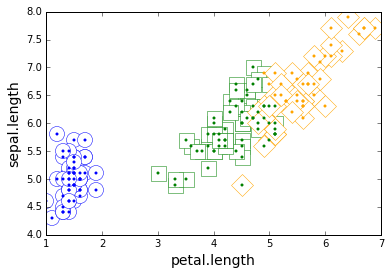

In [38]:
## Plot the clusters
colors = ['blue','green','orange']
shapes = ['o', 's', 'D']
xval = 'petal.length'
yval = 'sepal.length'
fig = plt.figure()

## Plot true species
for k in range(3):
    idx1 = iris_df['species'] == k
    plt.plot(iris_df[idx1][xval], iris_df[idx1][yval], ' ', markeredgecolor=colors[k], markerfacecolor='w', markersize=15, marker=shapes[k])

# Plot predicted species
for j in range(3):
    pred_k = align_classes(j)
    idx2 = iris_df['predicted_clust'] == pred_k
    plt.plot(iris_df[idx2][xval], iris_df[idx2][yval], ' ', markerfacecolor=colors[j], marker='.', markeredgewidth=0)
plt.xlabel(xval, fontsize=14)
plt.ylabel(yval, fontsize=14)
fig.savefig('iris_clusters.pdf')

##Classification

Classification is a supervised-learning technique used to identify the correct class to which a new (unseen) data point belongs. This class assignment is based on a model built from training data which contains known class labels. Many problems in biomedicine are classification problems, such as predicting whether or not a patient will respond to a particular drug.

`Scikit-learn` includes a number of classification algorithms, including:
- Nearest neighbors
- Random Forests
- Decision Trees
- Naive Bayes

A support vector machine (SVM) is a method for classifying data by identifying a hyperplane which divides the data into two classes. The hyperplane is selected to maximize the margin between the separating boundary and the training data. 

[http://en.wikipedia.org/wiki/Support_vector_machine](http://en.wikipedia.org/wiki/Support_vector_machine)

[http://scikit-learn.org/stable/modules/svm.html#svm](http://scikit-learn.org/stable/modules/svm.html#svm)

In [10]:
from sklearn import svm
import random

In [11]:
## Subset iris dataframe to include only two species
iris_df2 = iris_df[(iris_df['species'] == 1) | (iris_df['species'] == 2)]

## Create training and test datasets
train_idx = random.sample(iris_df2.index, len(iris_df2)/2)
test_idx = list(set(iris_df2.index) - set(train_idx))

iris_training = iris_df2.loc[train_idx]
iris_test = iris_df2.loc[test_idx]
iris_training.head()

,sepal.length,sepal.width,petal.length,petal.width,species,species_name
111,6.4,2.7,5.3,1.9,2,virginica
72,6.3,2.5,4.9,1.5,1,versicolor
60,5.0,2.0,3.5,1.0,1,versicolor
130,7.4,2.8,6.1,1.9,2,virginica
140,6.7,3.1,5.6,2.4,2,virginica


In [12]:
## Set kernel type ('linear', 'poly', or 'rbf'), and run SVM
## We will use only two variables, sepal.length and petal.length, for our classifier
kernel_type = "poly"
iris_class = svm.SVC(kernel=kernel_type, C=0.05)
iris_class.fit(iris_training[['sepal.length','petal.length']], iris_training['species'])

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
## View the predicted classes for the test data
iris_class.predict(iris_test[['sepal.length','petal.length']])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2])

In [14]:
## Add predicted classes to the dataframe
iris_test['svm_predicted'] = pd.Series(iris_class.predict(iris_test[['sepal.length','petal.length']]), index=iris_test.index)
iris_test.head()

,sepal.length,sepal.width,petal.length,petal.width,species,species_name,svm_predicted
128,6.4,2.8,5.6,2.1,2,virginica,2
129,7.2,3.0,5.8,1.6,2,virginica,2
132,6.4,2.8,5.6,2.2,2,virginica,2
134,6.1,2.6,5.6,1.4,2,virginica,2
136,6.3,3.4,5.6,2.4,2,virginica,2


In [18]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.tools.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True)
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : a column, Grouper, array which has the same length as data, or list of them.
        Keys to group by on the pivot table index.
        If an array is passed, it is being used as the same manner as column values.
    columns : a column, Grouper, array which has the same length as data, or list of them.
        Keys to group by on the pivot table column.
        If an array is passed, it is being used as the same manner as column values.
    aggfunc : function, default numpy.mean, or list of functions

In [39]:
## Compare true and predicted values
grouped = iris_test.groupby(['species','svm_predicted']).size()[:]
grouped

species  svm_predicted
1        1                23
         2                 2
2        1                 2
         2                23
dtype: int64

In [46]:
iris_test[['species','svm_predicted']].pivot_table(index='species', columns='svm_predicted', aggfunc=lambda x: len(x[x.notnull()]), fill_value=0)

svm_predicted,1,2
species,,
1,23,2
2,2,23


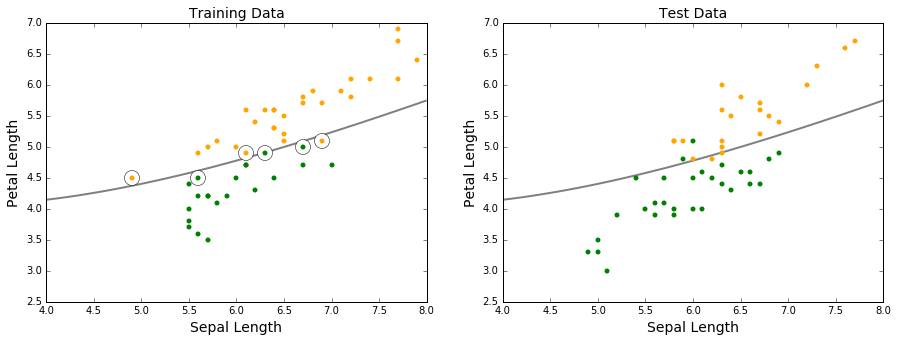

In [24]:
## Plot the SVM results
fig = plt.figure(figsize=(15,5))

## Create subplot for the training data
plt.subplot(1, 2, 1)
## Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(4, 8, 50),np.linspace(2.5, 7, 50))
Z = iris_class.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--', colors="gray")

## Plot the data points for the training data
plt.plot(iris_class.support_vectors_[:,0], iris_class.support_vectors_[:,1], ' ', marker='o', markersize=15, markerfacecolor='w')
plt.plot(iris_training[iris_training['species'] == 1]['sepal.length'], iris_training[iris_training['species'] == 1]['petal.length'], ' ', markerfacecolor='green', marker='.', markersize=10, markeredgewidth=0)
plt.plot(iris_training[iris_training['species'] == 2]['sepal.length'], iris_training[iris_training['species'] == 2]['petal.length'], ' ', markerfacecolor='orange', marker='.', markersize=10, markeredgewidth=0)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Petal Length', fontsize=14)
plt.title("Training Data", fontsize=14)

## Create subplot for the test data
plt.subplot(1, 2, 2)
## Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(4, 8, 50),np.linspace(2.5, 7, 50))
Z = iris_class.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--', colors="gray")

## Plot the data points for the test data
plt.plot(iris_test[iris_test['species'] == 1]['sepal.length'], iris_test[iris_test['species'] == 1]['petal.length'], ' ', markerfacecolor='green', marker='.', markersize=10, markeredgewidth=0)
plt.plot(iris_test[iris_test['species'] == 2]['sepal.length'], iris_test[iris_test['species'] == 2]['petal.length'], ' ', markerfacecolor='orange', marker='.', markersize=10, markeredgewidth=0)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Petal Length', fontsize=14)
plt.title("Test Data", fontsize=14)

## Dimensionality Reduction

Principal Component Analysis (PCA) is a technique used in exploratory data analysis to transform a set of correlated variables into a set of uncorrelated variables called principal components (PC). The transformation is done so that the first PC accounts for the largest amount of variance in the data. Each successive PC accounts for the largest amount of variance orthogonal (i.e. uncorrelated) to the preceeding PCs. Because of this feature, PCA is often used for dimensionality reduction (reducing the number of variables considered in an analysis).  

[http://en.wikipedia.org/wiki/Principal_component_analysis](http://en.wikipedia.org/wiki/Principal_component_analysis)

[http://scikit-learn.org/stable/modules/decomposition.html#pca](http://scikit-learn.org/stable/modules/decomposition.html#pca)

In [28]:
from sklearn.decomposition import PCA

In [29]:
iris_df.groupby(['species','species_name']).size()

species  species_name
0        setosa          50
1        versicolor      50
2        virginica       50
dtype: int64

In [30]:
X = iris_df[['sepal.length','sepal.width','petal.length','petal.width']]
Y = iris_df['species']
species_names = list(iris_df['species_name'].value_counts().index)

pca = PCA()
X_transformed = pca.fit(X).transform(X)

In [28]:
species_names

['setosa', 'versicolor', 'virginica']

In [31]:
X_transformed[0:5,]

array([[ -2.68420713e+00,  -3.26607315e-01,   2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,   1.69556848e-01,   2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,   1.37345610e-01,  -2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,   3.11124316e-01,  -3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,  -3.33924564e-01,  -9.62296998e-02,
         -6.31287327e-02]])

In [32]:
## Proportion of explained variance
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

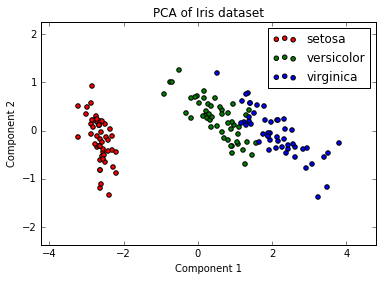

In [33]:
fig = plt.figure()
for c, i, name in zip("rgb", [0, 1, 2], species_names):
    plt.scatter(X_transformed[Y.values == i, 0], X_transformed[Y.values == i, 1], c=c, label=name)
plt.xlim(np.min(X_transformed[:,0])-1, np.max(X_transformed[:,0])+1)
plt.ylim(np.min(X_transformed[:,1])-1, np.max(X_transformed[:,1])+1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.title('PCA of Iris dataset')

## In-Class Exercises

In [ ]:
## Exercise 1.
## Identify which variable is most correlated with the first PCA component
## Use scipy.stats.pearsonr()
##
iris_df['PC1'] = pd.Series(X_transformed[:,0], index=iris_df.index)
iris_df['PC2'] = pd.Series(X_transformed[:,1], index=iris_df.index)
iris_df['PC3'] = pd.Series(X_transformed[:,2], index=iris_df.index)
iris_df['PC4'] = pd.Series(X_transformed[:,3], index=iris_df.index)

In [36]:
cols = ['sepal.length','sepal.width','petal.length','petal.width', 'PC1']
np.corrcoef(iris_df[cols], rowvar=0)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363,  0.89754488],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409, -0.38999338],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ,  0.99785405],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ,  0.96648418],
       [ 0.89754488, -0.38999338,  0.99785405,  0.96648418,  1.        ]])

In [ ]:
## Exercise 2.
## Choose a few different parameter values for the SVM 
## Use the Pandas groupby method to calculate the accuracy of the different classifiers
##

In [47]:
## Exercise 3.
## Use the first two PCs from the PCA analysis to build an SVM
##
iris_df3 = iris_df[(iris_df['species'] == 1) | (iris_df['species'] == 2)]

## Create training and test datasets
train_idx = random.sample(iris_df3.index, len(iris_df3)/2)
test_idx = list(set(iris_df3.index) - set(train_idx))

iris_training2 = iris_df3.loc[train_idx]
iris_test2 = iris_df3.loc[test_idx]

kernel_type = "linear"
iris_class2 = svm.SVC(kernel=kernel_type, C=0.05)
iris_class2.fit(iris_training2[['PC1','PC2','PC3']], iris_training2['species'])

iris_test2['svm_pc_predicted'] = pd.Series(iris_class2.predict(iris_test2[['PC1','PC2','PC3']]), index=iris_test2.index)

iris_test2.groupby(['species','svm_pc_predicted']).size()

IndexingError: Too many indexers

In [43]:
iris_df3.head()

,sepal.length,sepal.width,petal.length,petal.width,species,species_name,predicted_clust,PC1,PC2,PC3,PC4
50,7.0,3.2,4.7,1.4,1,versicolor,2,1.284795,-0.685439,0.406130,0.019290
51,6.4,3.2,4.5,1.5,1,versicolor,2,0.932411,-0.319198,0.017130,-0.000007
52,6.9,3.1,4.9,1.5,1,versicolor,0,1.464061,-0.504190,0.338261,-0.000858
53,5.5,2.3,4.0,1.3,1,versicolor,2,0.180967,0.825604,0.177083,0.095784
54,6.5,2.8,4.6,1.5,1,versicolor,2,1.087134,-0.075390,0.306544,0.113385


## References

- Python for Bioinformatics, Sebastian Bassi, CRC Press (2010)
- [http://scikit-learn.org/stable/index.html](http://scikit-learn.org/stable/index.html)

#### Last Updated: 25-Nov-2015